# Mengimpor datasets

In [1]:
# Import library

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')  # membaca dataframe

In [3]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


# Preprocessing data

In [4]:
df.isna().sum()  # cek missing value

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [5]:
df.shape

(390, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [7]:
df['chol_hdl_ratio']   = df['chol_hdl_ratio'].replace(',','.', regex=True)
df['bmi']              = df['bmi'].replace(',','.', regex=True)
df['waist_hip_ratio']  = df['waist_hip_ratio'].replace(',','.', regex=True)

In [8]:
df['chol_hdl_ratio']   = df['chol_hdl_ratio'].astype(float)
df['bmi']              = df['bmi'].astype(float)
df['waist_hip_ratio']  = df['waist_hip_ratio'].astype(float)

In [9]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Encode kolom label diabetes

diabetes_encode = {'No diabetes':1, 'Diabetes':0}
df['diabetes'] = df['diabetes'].map(diabetes_encode)

In [12]:
# Encode kolom gender

gender = df['gender'].values.reshape(-1,1)

one_hot = OneHotEncoder()
gender = one_hot.fit_transform(gender).toarray()

In [13]:
one_hot.categories_

[array(['female', 'male'], dtype=object)]

In [14]:
df_gender = pd.DataFrame(gender, columns=[str(i) for i in range(gender.shape[1])])

In [15]:
df = pd.concat([df_gender, df], 1)

In [16]:
df.drop(columns=['gender', 'patient_number'], axis=1, inplace=True)

In [17]:
df = df.rename(columns = {'0' : 'female', '1' : 'male'})

In [18]:
df['female'] = df['female'].astype(int)
df['male']   = df['male'].astype(int)

In [19]:
df.head()

,female,male,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,0,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,1
1,1,0,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,1
2,1,0,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,1
3,1,0,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,1
4,1,0,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   female           390 non-null    int32  
 1   male             390 non-null    int32  
 2   cholesterol      390 non-null    int64  
 3   glucose          390 non-null    int64  
 4   hdl_chol         390 non-null    int64  
 5   chol_hdl_ratio   390 non-null    float64
 6   age              390 non-null    int64  
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    int64  
dtypes: float64(3), int32(2), int64(11)
memory usage: 45.8 KB


In [21]:
df.diabetes.value_counts()

1    330
0     60
Name: diabetes, dtype: int64

# Membagi data

In [22]:
X = df.drop('diabetes', 1)
y = df['diabetes']

# Normalisasi

In [23]:
# from sklearn.preprocessing import MinMaxScaler

In [24]:
# X_nump = np.array(X)
# scaler = MinMaxScaler()

# scaled = scaler.fit_transform(X_nump)
# scaled = pd.DataFrame(scaled,columns= ['female', 'male', 'cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio'])
# scaled.head()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

# ax1.set_title('Before min-max scaling')
# sns.kdeplot(X['cholesterol'], ax=ax1)
# sns.kdeplot(X['glucose'], ax=ax1)
# sns.kdeplot(X['hdl_chol'], ax=ax1)
# sns.kdeplot(X['chol_hdl_ratio'], ax=ax1)

# ax2.set_title('After min-max scaling')
# sns.kdeplot(scaled['cholesterol'], ax=ax2)
# sns.kdeplot(scaled['glucose'], ax=ax2)
# sns.kdeplot(scaled['hdl_chol'], ax=ax2)
# sns.kdeplot(scaled['chol_hdl_ratio'], ax=ax2)

# plt.show()

# Testing dan Training

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# X = scaled
# y = df['diabetes']

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

# Feature selection

## ------K Best------

In [30]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [31]:
univariate = f_classif(X_train, y_train)
univariate

(array([2.25276475e-02, 2.25276475e-02, 1.55508044e+01, 2.77209611e+02,
        4.24384363e+00, 2.74961632e+01, 3.39491946e+01, 1.25443265e-01,
        8.52903868e+00, 8.60481964e+00, 1.44043435e+01, 1.57823371e+00,
        1.77256602e+01, 8.61202713e+00, 8.66356772e+00]),
 array([8.80778633e-01, 8.80778633e-01, 9.70829118e-05, 3.17009456e-46,
        4.01338882e-02, 2.73392002e-07, 1.28638712e-08, 7.23418100e-01,
        3.72250748e-03, 3.57436047e-03, 1.73816134e-04, 2.09855571e-01,
        3.25026375e-05, 3.56058784e-03, 3.46366764e-03]))

In [32]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

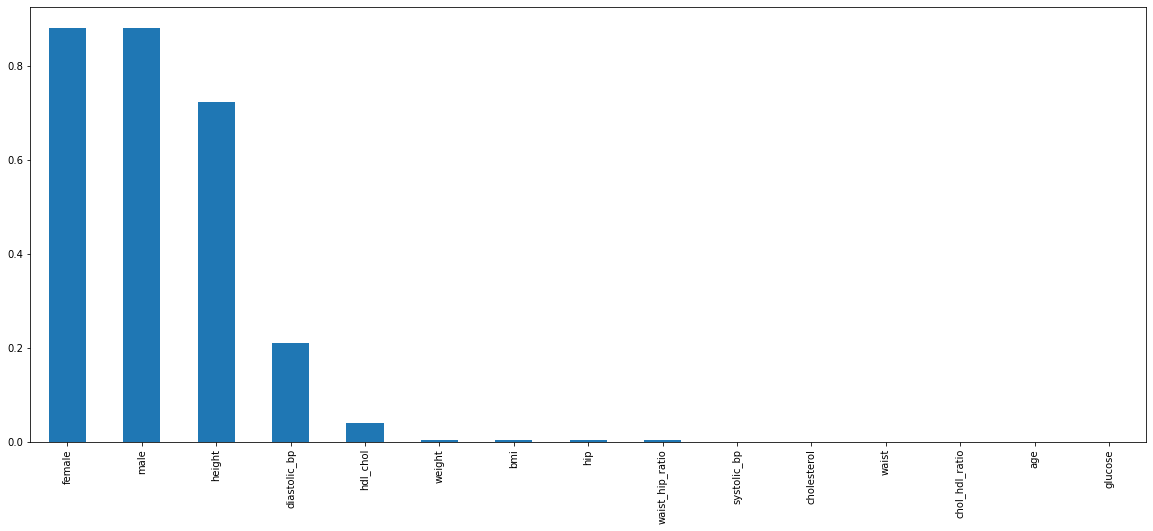

In [33]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [34]:
sel_ = SelectKBest(f_classif, k=11).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'weight',
       'bmi', 'systolic_bp', 'waist', 'hip', 'waist_hip_ratio'],
      dtype='object')

## ------Korelasi------

In [35]:
data = pd.concat([X,y],1)
data = data.corr(method='pearson')

<AxesSubplot:>

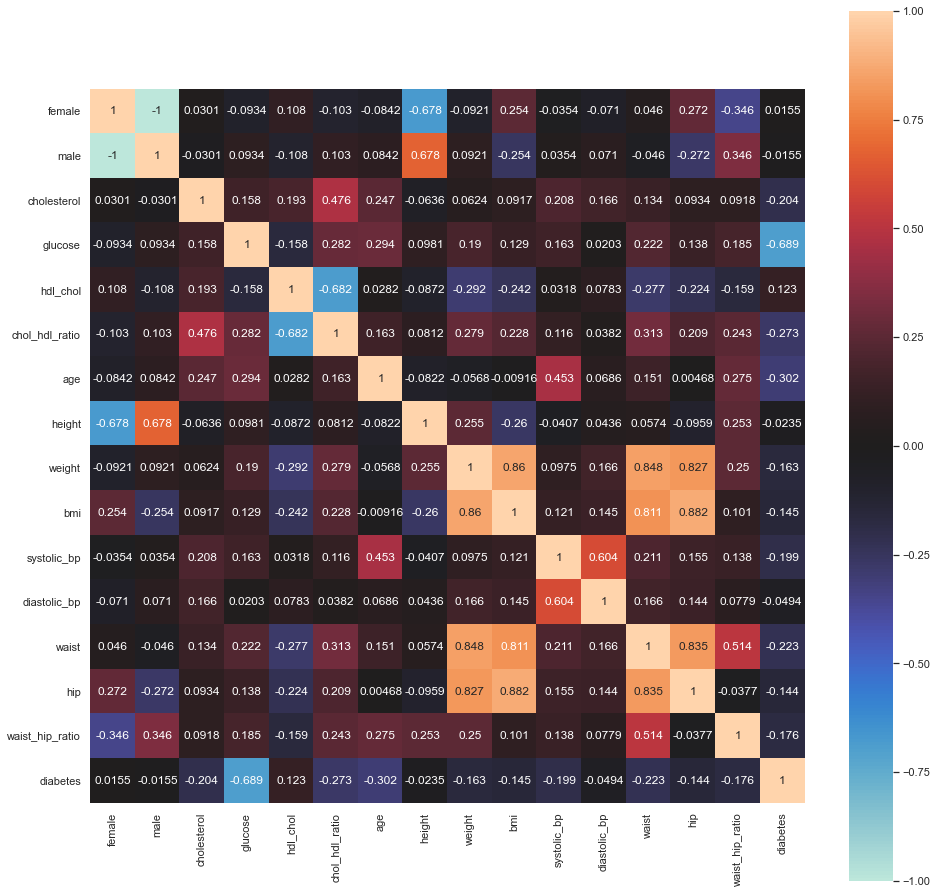

In [36]:
sns.set(rc = {'figure.figsize':(16,16)})
sns.heatmap(data, annot=True, fmt='.3g', vmax=1, vmin=-1, center=0, square=True)

In [37]:
X_train = sel_.transform(X_train)
X_train.shape

(351, 11)

In [38]:
X_test = sel_.transform(X_test)
X_test.shape

(39, 11)

# Mencari Parameter Optimal dengan Pipeline

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## K-Nearest Neighbors

In [40]:
classifier_knn = Pipeline([
    ('model', KNeighborsClassifier()),
])

In [41]:
classifier_knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__algorithm', 'model__leaf_size', 'model__metric', 'model__metric_params', 'model__n_jobs', 'model__n_neighbors', 'model__p', 'model__weights'])

In [42]:
param_grid_knn = {             
               'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
               'model__metric': ['euclidean', 'manhattan'],
               'model__weights': ['uniform', 'distance']
}

In [43]:
clf_knn = GridSearchCV(estimator=classifier_knn,           
                      param_grid=param_grid_knn, 
                      cv=5,
                      return_train_score=True,
                      n_jobs=-1
                  )

In [44]:
clf_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__metric': ['euclidean', 'manhattan'],
                         'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'model__weights': ['uniform', 'distance']},
             return_train_score=True)

In [45]:
print("\nBest estimator:")
print()
print(clf_knn.best_estimator_)


Best estimator:

Pipeline(steps=[('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7))])


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [47]:
y_pred_knn_train = clf_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Accuracy Training set: ", accuracy_knn_train)

y_pred_knn_test = clf_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Accuracy Test set: ", accuracy_knn_test)

Accuracy Training set:  0.9344729344729344
Accuracy Test set:  0.8974358974358975


In [48]:
recall_knn_train = recall_score(y_train, y_pred_knn_train, average='micro')
print("Recall Training set: ", recall_knn_train)

recall_knn_test = recall_score(y_test, y_pred_knn_test, average='micro')
print("Recall Test set: ", recall_knn_test)

Recall Training set:  0.9344729344729344
Recall Test set:  0.8974358974358975


In [49]:
precision_knn_train = precision_score(y_train, y_pred_knn_train, average='micro')
print("Precision Training set: ", precision_knn_train)

precision_knn_test = precision_score(y_test, y_pred_knn_test, average='micro')
print("Precision Test set: ", precision_knn_test)

Precision Training set:  0.9344729344729344
Precision Test set:  0.8974358974358975


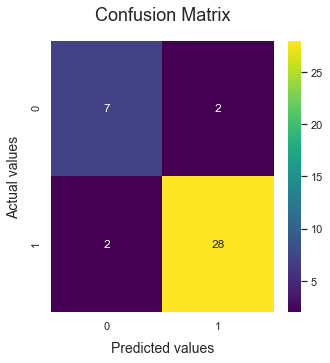

In [50]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

## Naive Bayes

In [51]:
classifier_nb = Pipeline([
    ('model', MultinomialNB()),
])

In [52]:
param_grid_nb = {             
               'model__alpha': (0, 1, 1e-2, 1e-3)
}

In [53]:
clf_nb = GridSearchCV(classifier_nb, param_grid_nb, cv = 5, n_jobs=-1)

In [54]:
classifier_nb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__alpha', 'model__class_prior', 'model__fit_prior'])

In [55]:
clf_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', MultinomialNB())]),
             n_jobs=-1, param_grid={'model__alpha': (0, 1, 0.01, 0.001)})

In [56]:
print("\nBest estimator:")
print()
print(clf_nb.best_estimator_)


Best estimator:

Pipeline(steps=[('model', MultinomialNB(alpha=0))])


In [57]:
y_pred_nb_train = clf_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = clf_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.9088319088319088
Accuracy Test set:  0.9230769230769231


In [58]:
recall_nb_train = recall_score(y_train, y_pred_nb_train, average='micro')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(y_test, y_pred_nb_test, average='micro')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.9088319088319088
Recall Test set:  0.9230769230769231


In [59]:
precision_nb_train = precision_score(y_train, y_pred_nb_train, average='micro')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(y_test, y_pred_nb_test, average='micro')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.9088319088319088
Precision Test set:  0.9230769230769231


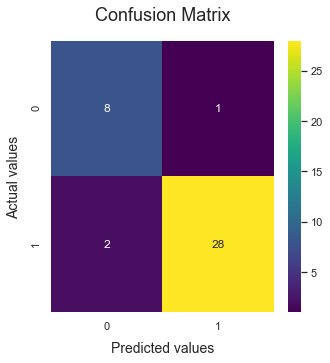

In [60]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# 

## Decisoon Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
classifier_dt = Pipeline([
    ('model', DecisionTreeClassifier()),
])

In [63]:
classifier_dt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__random_state', 'model__splitter'])

In [64]:
param_grid_dt = { 
    'model__criterion': ['entropy','gini'],
    'model__max_depth': np.arange(1,21),
    'model__min_samples_leaf': [1, 5, 10, 20, 50, 100],
    'model__min_samples_split': np.arange(2, 11),
}

In [65]:
clf_dt = GridSearchCV(estimator=classifier_dt, param_grid=param_grid_dt, cv= 5, n_jobs=-1)

In [66]:
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['entropy', 'gini'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': [1, 5, 10, 20, 50, 100],
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [67]:
print("\nBest estimator:")
print()
print(clf_dt.best_estimator_)


Best estimator:

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=10,
                                        min_samples_split=3))])


In [68]:
y_pred_dt_train = clf_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Accuracy Training set: ", accuracy_dt_train)

y_pred_dt_test = clf_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Accuracy Test set: ", accuracy_dt_test)

Accuracy Training set:  0.9458689458689459
Accuracy Test set:  0.9487179487179487


In [69]:
recall_dt_train = recall_score(y_train, y_pred_dt_train, average='micro')
print("Recall Training set: ", recall_dt_train)

recall_dt_test = recall_score(y_test, y_pred_dt_test, average='micro')
print("Recall Test set: ", recall_dt_test)

Recall Training set:  0.9458689458689459
Recall Test set:  0.9487179487179487


In [70]:
precision_dt_train = precision_score(y_train, y_pred_dt_train, average='micro')
print("Precision Training set: ", precision_dt_train)

precision_dt_test = precision_score(y_test, y_pred_dt_test, average='micro')
print("Precision Test set: ", precision_dt_test)

Precision Training set:  0.9458689458689459
Precision Test set:  0.9487179487179487


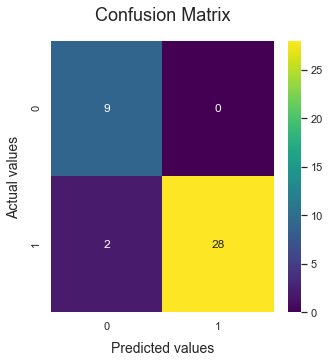

In [71]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# 

## SGD Classifier

In [72]:
from sklearn.linear_model import SGDClassifier

In [73]:
classifier_sgd = Pipeline([
    ('model', SGDClassifier()),
])

In [74]:
classifier_sgd.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__alpha', 'model__average', 'model__class_weight', 'model__early_stopping', 'model__epsilon', 'model__eta0', 'model__fit_intercept', 'model__l1_ratio', 'model__learning_rate', 'model__loss', 'model__max_iter', 'model__n_iter_no_change', 'model__n_jobs', 'model__penalty', 'model__power_t', 'model__random_state', 'model__shuffle', 'model__tol', 'model__validation_fraction', 'model__verbose', 'model__warm_start'])

In [75]:
param_grid_sgd = { 
    'model__loss': ['log'],
    'model__penalty': ['elasticnet'],
    'model__alpha': [10 ** x for x in range(-6, 1)],
    'model__l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1]
}

In [76]:
clf_sgd = GridSearchCV(estimator=classifier_sgd, param_grid=param_grid_sgd, cv= 5, n_jobs=-1)

In [77]:
clf_sgd.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'model__alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                          0.1, 1],
                         'model__l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9,
                                             0.95, 1],
                         'model__loss': ['log'],
                         'model__penalty': ['elasticnet']})

In [78]:
print("\nBest estimator:")
print()
print(clf_sgd.best_estimator_)


Best estimator:

Pipeline(steps=[('model',
                 SGDClassifier(alpha=0.1, l1_ratio=0.1, loss='log',
                               penalty='elasticnet'))])


In [79]:
y_pred_sgd_train = clf_sgd.predict(X_train)
accuracy_sgd_train = accuracy_score(y_train, y_pred_sgd_train)
print("Accuracy Training set: ", accuracy_sgd_train)

y_pred_sgd_test = clf_sgd.predict(X_test)
accuracy_sgd_test = accuracy_score(y_test, y_pred_sgd_test)
print("Accuracy Test set: ", accuracy_sgd_test)

Accuracy Training set:  0.9145299145299145
Accuracy Test set:  0.9487179487179487


In [80]:
recall_sgd_train = recall_score(y_train, y_pred_sgd_train, average='micro')
print("Recall Training set: ", recall_sgd_train)

recall_sgd_test = recall_score(y_test, y_pred_sgd_test, average='micro')
print("Recall Test set: ", recall_sgd_test)

Recall Training set:  0.9145299145299145
Recall Test set:  0.9487179487179487


In [81]:
precision_sgd_train = precision_score(y_train, y_pred_sgd_train, average='micro')
print("Precision Training set: ", precision_sgd_train)

precision_sgd_test = precision_score(y_test, y_pred_sgd_test, average='micro')
print("Precision Test set: ", precision_sgd_test)

Precision Training set:  0.9145299145299145
Precision Test set:  0.9487179487179487


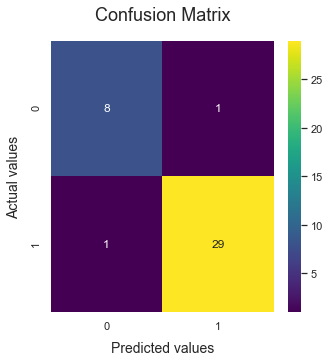

In [82]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sgd_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# 

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
classifier_lr = Pipeline([
    ('model', LogisticRegression()),
])

In [85]:
classifier_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [86]:
param_grid_lr = {
               'model__solver': ['newton-cg', 'lbfgs','sag', 'saga'],
               'model__C':[0.5,1,1.5,2,2.5],
               'model__class_weight':[None,'balanced'],
               'model__max_iter':[1000,2000,3000],
               'model__penalty':['l1','l2']
}

In [87]:
clf_lr = GridSearchCV(estimator=classifier_lr, param_grid=param_grid_lr, cv= 5, n_jobs=-1)

In [88]:
clf_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1, 1.5, 2, 2.5],
                         'model__class_weight': [None, 'balanced'],
                         'model__max_iter': [1000, 2000, 3000],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['newton-cg', 'lbfgs', 'sag',
                                           'saga']})

In [89]:
print("\nBest estimator:")
print()
print(clf_lr.best_estimator_)


Best estimator:

Pipeline(steps=[('model',
                 LogisticRegression(C=0.5, max_iter=1000, penalty='l1',
                                    solver='saga'))])


In [90]:
y_pred_lr_train = clf_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Accuracy Training set: ", accuracy_lr_train)

y_pred_lr_test = clf_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Accuracy Test set: ", accuracy_lr_test)

Accuracy Training set:  0.9116809116809117
Accuracy Test set:  0.9230769230769231


In [91]:
recall_lr_train = recall_score(y_train, y_pred_lr_train, average='micro')
print("Recall Training set: ", recall_lr_train)

recall_lr_test = recall_score(y_test, y_pred_lr_test, average='micro')
print("Recall Test set: ", recall_lr_test)

Recall Training set:  0.9116809116809117
Recall Test set:  0.9230769230769231


In [92]:
precision_lr_train = precision_score(y_train, y_pred_lr_train, average='micro')
print("Precision Training set: ", precision_lr_train)

precision_lr_test = precision_score(y_test, y_pred_lr_test, average='micro')
print("Precision Test set: ", precision_lr_test)

Precision Training set:  0.9116809116809117
Precision Test set:  0.9230769230769231


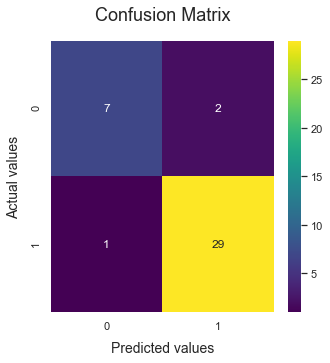

In [93]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# 

# 

In [94]:
models = [
          ('Decision Tree', accuracy_dt_train, accuracy_dt_test),
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
          ('K-Nearest Neighbors', accuracy_knn_train, accuracy_knn_test),
          ('SGD Classifier', accuracy_sgd_train, accuracy_sgd_test),
          ('Logistic Regression', accuracy_lr_train, accuracy_lr_test)
         ]

In [95]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree,0.945869,0.948718
1,Naive Bayes Multinomial,0.908832,0.923077
2,K-Nearest Neighbors,0.934473,0.897436
3,SGD Classifier,0.914530,0.948718
4,Logistic Regression,0.911681,0.923077


In [96]:
models_comparison = [
                        ('Decision Tree', accuracy_dt_test, recall_dt_test, precision_dt_test), 
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),
                        ('K-Nearest Neighbors', accuracy_knn_test, recall_knn_test, precision_knn_test),
                        ('SGD Classifier', accuracy_sgd_test, recall_sgd_test, precision_sgd_test),
                        ('Logistic Regression', accuracy_lr_test, recall_lr_test, precision_lr_test)
                    ]

In [97]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree,0.948718,0.948718,0.948718
1,Naive Bayes Multinomial,0.923077,0.923077,0.923077
2,K-Nearest Neighbors,0.897436,0.897436,0.897436
3,SGD Classifier,0.948718,0.948718,0.948718
4,Logistic Regression,0.923077,0.923077,0.923077


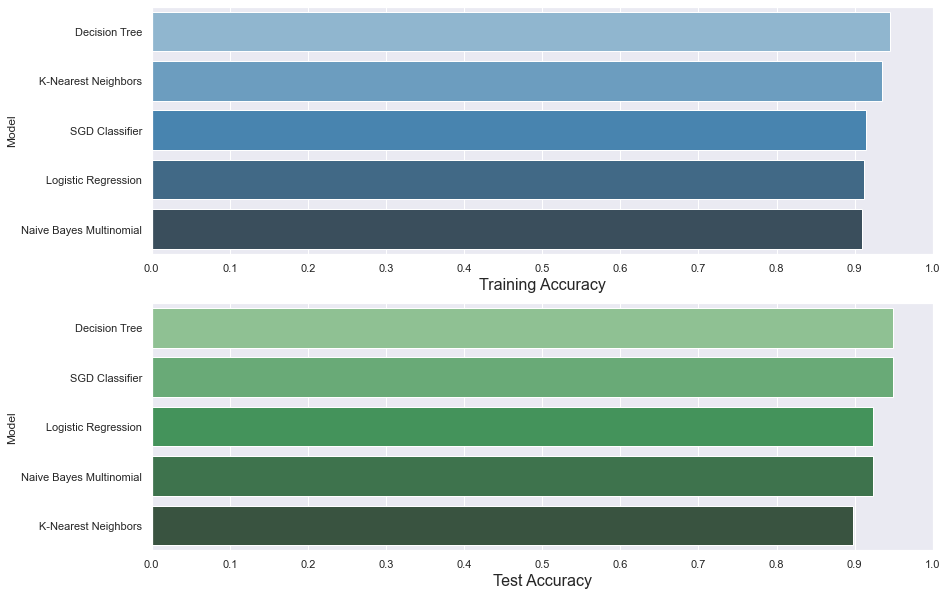

In [98]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()